# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

# Importing the Dataset

In [2]:
data = pd.read_csv(r"C:\Users\Siri\Anaconda_files\TrafficTelligence - Advanced Traffic Volume Estimation with Machine Learning\traffic volume.csv")
data

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918
...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,Clouds,30-09-2018,19:00:00,3543
48200,None,282.76,0.0,0.0,Clouds,30-09-2018,20:00:00,2781
48201,None,282.73,0.0,0.0,Thunderstorm,30-09-2018,21:00:00,2159
48202,None,282.09,0.0,0.0,Clouds,30-09-2018,22:00:00,1450


# Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [4]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


## Handling null values

In [5]:
data.isnull().any()

holiday           False
temp               True
rain               True
snow               True
weather            True
date              False
Time              False
traffic_volume    False
dtype: bool

In [6]:
data.isnull().sum()

holiday            0
temp              53
rain               2
snow              12
weather           49
date               0
Time               0
traffic_volume     0
dtype: int64

There are null values in the columns _temp, rain, snow_ and _weather_. _Temp, rain_ and _snow_ are float values. Hence we can replace them with mean values.

In [7]:
data["temp"].fillna(data["temp"].mean(), inplace = True)
data["rain"].fillna(data["rain"].mean(), inplace = True)
data["snow"].fillna(data["snow"].mean(), inplace = True)

data["weather"].fillna(data["weather"].mode()[0], inplace = True)

data.isnull().sum()

holiday           0
temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
dtype: int64

Now, there are no null values.

## Splitting Date and Time column

In [8]:
data[["Day", "Month", "Year"]] = data["date"].str.split("-", expand = True)
data[["Hours", "Minutes", "Seconds"]] = data["Time"].str.split(":", expand = True)
data.drop(columns = ["date", "Time"], axis = 1, inplace = True)

data

,holiday,temp,rain,snow,weather,traffic_volume,Day,Month,Year,Hours,Minutes,Seconds
0,None,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,None,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,None,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,None,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,None,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,Clouds,3543,30,09,2018,19,00,00
48200,None,282.76,0.0,0.0,Clouds,2781,30,09,2018,20,00,00
48201,None,282.73,0.0,0.0,Thunderstorm,2159,30,09,2018,21,00,00
48202,None,282.09,0.0,0.0,Clouds,1450,30,09,2018,22,00,00


## Checking Descriptive Statistics

In [9]:
data.describe()

,temp,rain,snow,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.336338,44.789133,0.008168,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.180000,0.000000,0.000000,1193.000000
50%,282.429000,0.000000,0.000000,3380.000000
75%,291.800000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


## Checking Correlation

In [10]:
corr = data.corr()
corr

C:\Users\Siri\AppData\Local\Temp\ipykernel_14996\2601176157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,temp,rain,snow,traffic_volume
temp,1.000000,0.009070,-0.019758,0.130034
rain,0.009070,1.000000,-0.000090,0.004714
snow,-0.019758,-0.000090,1.000000,0.000735
traffic_volume,0.130034,0.004714,0.000735,1.000000


<Axes: >

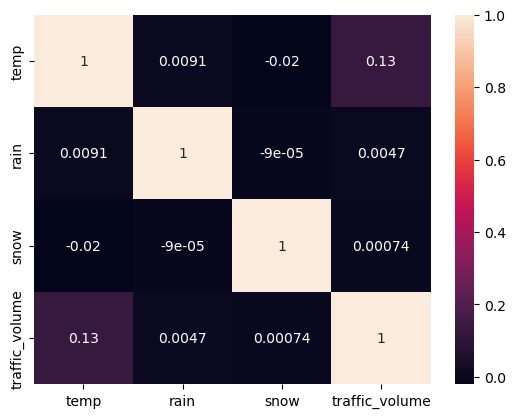

In [11]:
sns.heatmap(corr, annot = True)

# Exploratory Data Analysis

## Univariate Analysis

<Axes: xlabel='weather', ylabel='Count'>

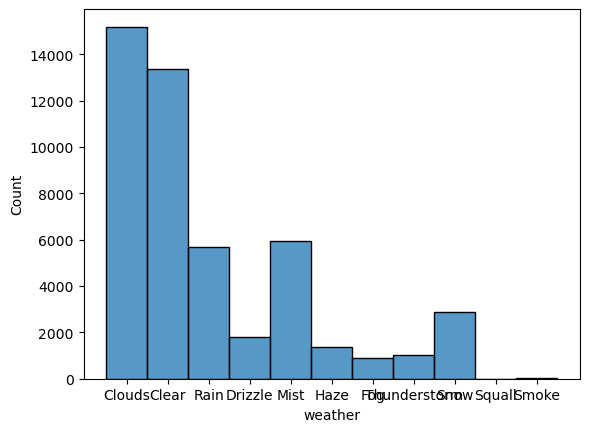

In [12]:
sns.histplot(data["weather"])

## Bivariate Analysis

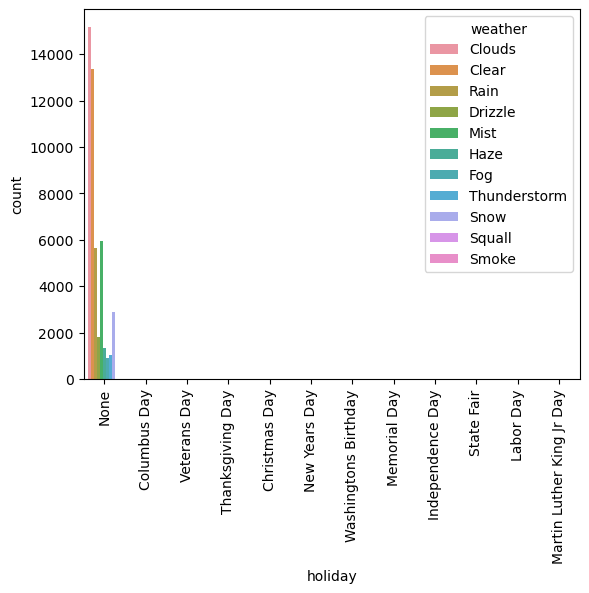

In [13]:
sns.countplot(x = "holiday", data = data, hue = data["weather"], orient = 'h')

plt.xticks(rotation=90)
plt.show()

In [14]:
data.holiday.value_counts()

None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

In [15]:
data.temp.max()

310.07

In [16]:
data.rain.max()

9831.3

## Multivariate Analysis

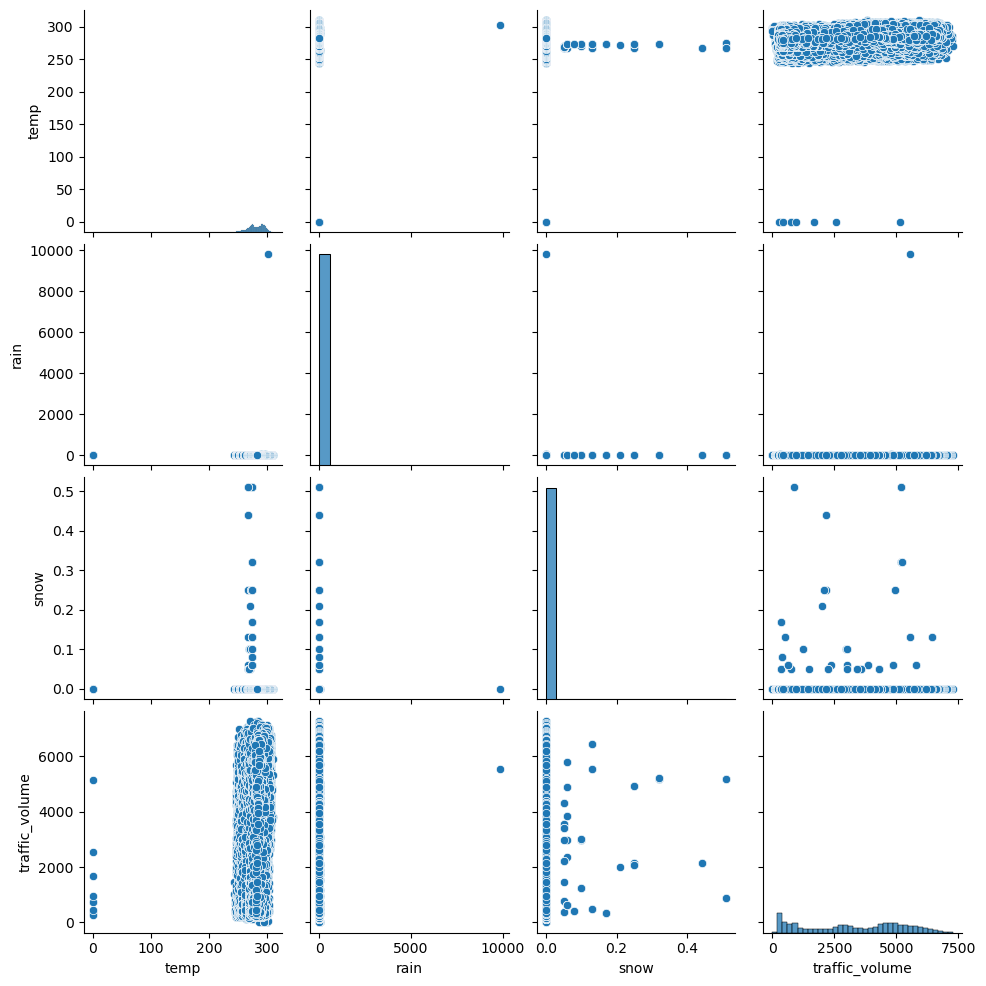

In [17]:
sns.pairplot(data)

<Axes: >

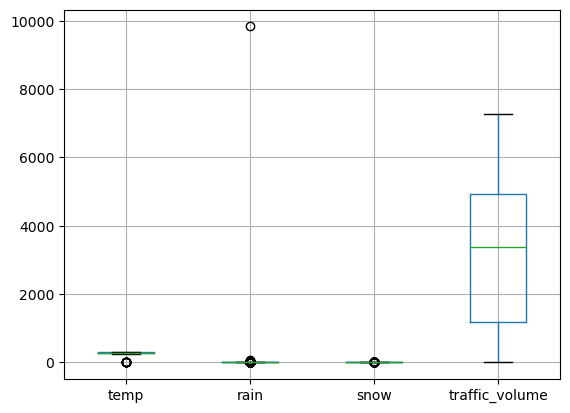

In [18]:
data.boxplot()

There are no outliers in the given dataset.

# Splitting the data into X and Y

In [19]:
y = data["traffic_volume"]
x = data.drop(columns = ["traffic_volume"], axis = 1)

names = x.columns

In [20]:
y.shape

(48204,)

## Feature Scaling

In [21]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

x["weather"] = LE.fit_transform(x["weather"])
x["holiday"] = LE.fit_transform(x["holiday"])

from sklearn.preprocessing import MinMaxScaler
MS = MinMaxScaler()

x_Scaled = pd.DataFrame(MS.fit_transform(x), columns = x.columns)
x_Scaled.head()

,holiday,temp,rain,snow,weather,Day,Month,Year,Hours,Minutes,Seconds
0,0.636364,0.929726,0.0,0.0,0.1,0.033333,0.818182,0.0,0.391304,0.0,0.0
1,0.636364,0.933209,0.0,0.0,0.1,0.033333,0.818182,0.0,0.434783,0.0,0.0
2,0.636364,0.933918,0.0,0.0,0.1,0.033333,0.818182,0.0,0.478261,0.0,0.0
3,0.636364,0.935692,0.0,0.0,0.1,0.033333,0.818182,0.0,0.521739,0.0,0.0
4,0.636364,0.938949,0.0,0.0,0.1,0.033333,0.818182,0.0,0.565217,0.0,0.0


# Splitting the data into Train and Test set

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_Scaled, y, test_size = 0.2, random_state = 0)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (38563, 11)
Shape of x_test: (9641, 11)
Shape of y_train: (38563,)
Shape of y_test: (9641,)


# Model Building

## Training the Model

In [23]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Performance Testing and Hyperparameter Tuning

## Testing model with multiple evaluation metrics

In [24]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [25]:
p6 = lin_reg.predict(x_test)
p7 = Dtree.predict(x_test)
p8 = Rand.predict(x_test)
p9 = svr.predict(x_test)
p10 = XGB.predict(x_test)

## Evaluating All models

### R - squared score

In [26]:
from sklearn import metrics
print(metrics.r2_score(p1, y_train))
print(metrics.r2_score(p2, y_train))
print(metrics.r2_score(p3, y_train))
print(metrics.r2_score(p4, y_train))
print(metrics.r2_score(p5, y_train))

-5.517285423636809
1.0
0.9744599411825714
-19.43147500585336
0.8472604817696772


In [27]:
print(metrics.r2_score(p6, y_test))
print(metrics.r2_score(p7, y_test))
print(metrics.r2_score(p8, y_test))
print(metrics.r2_score(p9, y_test))
print(metrics.r2_score(p10, y_test))

-5.3993963983221285
0.6938933700945613
0.8014312682305788
-19.197492508380627
0.8065613781045625


### Evaluating Metrics for Random Forest Regressor

In [32]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('R square score on train set and test set are :', Rand.score(x_train, y_train), Rand.score(x_test, y_test))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test, Rand.predict(x_test))))
print('Mean absolute error :', mean_absolute_error(y_test, Rand.predict(x_test)))

R square score on train set and test set are : 0.9770921235220543 0.8356571592510573
Root mean squared error : 801.6894273058929
Mean absolute error : 507.9025692355565


### Hyperparameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

parameter_grid ={'max_depth':np.arange(1,25),'n_estimators':np.arange(1,25)}
grid_search = GridSearchCV(Rand, parameter_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': 23, 'n_estimators': 24}

In [46]:
HRF = RandomForestRegressor(max_depth= 23, n_estimators= 24, random_state= 1231)
HRF.fit(x_train, y_train)

RandomForestRegressor(max_depth=23, n_estimators=24, random_state=1231)

In [47]:
print('R square score on train set and test set are :',HRF.score(x_train, y_train),HRF.score(x_test, y_test))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,HRF.predict(x_test))))
print('Mean absolute error :',mean_absolute_error(y_test, HRF.predict(x_test)))

R square score on train set and test set are : 0.964255906132786 0.8284691833318581
Root mean squared error : 819.0338269811183
Mean absolute error : 516.6675220665472


In [48]:
from sklearn.decomposition import PCA
pca = PCA(.90)
pca.fit(x_train)

PCA(n_components=0.9)

In [50]:
x_train.shape

(38563, 11)

In [51]:
pca.n_components_

5

In [52]:
PCA_X_train = pca.transform(x_train)
PCA_X_test = pca.transform(x_test)

In [53]:
RF_PCA = RandomForestRegressor()
RF_PCA.fit(PCA_X_train,y_train)

RandomForestRegressor()

In [62]:
print('R square score on train set and test set are :', RF_PCA.score(PCA_X_train, y_train),RF_PCA.score(PCA_X_test, y_test))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test,RF_PCA.predict(PCA_X_test))))
print('Mean absolute error :', mean_absolute_error(y_test, RF_PCA.predict(PCA_X_test)))

R square score on train set and test set are : 0.9718652757585765 0.8032429906444858
Root mean squared error : 877.1944347759498
Mean absolute error : 590.8631417902708


# Model Deployment

## Saving the model

In [63]:
import pickle
#pickle.dump(Rand, open("model.pkl", 'wb'))
#pickle.dump(LE, open("encoder.pkl", 'wb'))
#pickle.dump(MS, open("scaler.pkl", 'wb'))
#pickle.dump(HRF, open("HRF_Model.pkl", 'wb'))
#pickle.dump(RF_PCA, open("RF_PCA_Model.pkl", 'wb'))
#pickle.dump(pca, open("PCA.pkl", 'wb'))